# Ford GoBike dataset analysis
## by Mohamed Khaled Eldemerdash

### Imports

In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Loading Ford goBike dataset

In [64]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Wrangling

In [65]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [66]:
df.start_time

0         2019-02-28 17:32:10.1450
1         2019-02-28 18:53:21.7890
2         2019-02-28 12:13:13.2180
3         2019-02-28 17:54:26.0100
4         2019-02-28 23:54:18.5490
                    ...           
183407    2019-02-01 00:04:49.7240
183408    2019-02-01 00:05:34.7440
183409    2019-02-01 00:06:05.5490
183410    2019-02-01 00:05:34.3600
183411    2019-02-01 00:00:20.6360
Name: start_time, Length: 183412, dtype: object

In [67]:
df.duplicated().sum()

0

In [68]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Setting appropriate datatypes

In [70]:
#converting user_type to categorical
df['user_type'] = df['user_type'].astype('category')

#converting start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### Extracting important features

In [71]:
#converting duration to minutes instead of seconds
df['duration_min'] = df['duration_sec']/60

# Extracting hour, day from datetime variables
df['start_time_hour']= df['start_time'].dt.hour

weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)

df['start_time_day'] = df['start_time'].dt.strftime('%a').astype(ordered_weekdays)

In [72]:
# Remove gender nulls
df_clean = df[df['member_gender'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  int64         
 12  user_type       

In [73]:
df_clean['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [74]:
df_clean['user_type'].value_counts()

Subscriber    158516
Customer       16631
Name: user_type, dtype: int64

In [75]:
# Remove id nulls
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [76]:
#converting ids to str
df_clean['start_station_id'] = df_clean['start_station_id'].astype('str')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('str')
df_clean['bike_id'] =df_clean['bike_id'].astype('str')

In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [78]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_time_hour,start_time_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,17,Thu
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,12,Thu
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,17,Thu
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,23,Thu
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.883333,23,Thu


In [79]:
# Calculating age
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [80]:
df_clean['member_age'] = df_clean['member_age'].astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [82]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_time_hour,start_time_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,17,Thu,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,12,Thu,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,17,Thu,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,23,Thu,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,23,Thu,60


### What is the structure of your dataset?

This dataset initially held 183412 records of Ford GoBike data and consisted of 16 variables.

After cleaning the dataframe, and extracting new features from variables we ended up with 174952 records and 19 features.


### What is/are the main feature(s) of interest in your dataset?

trip duration: Trip duration in seconds
start time: time when the bike trip starts
end time: time when the bike trip ends
station details: start & end station, its name, id as well as their respective latitude and longitude
Bike details: bike id
Customer details: user type, date of birth and gender 


I am going to focus on the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time 

user_type

member_birth_year

member_gender

The extracted features might also be useful in the analysis

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### I will start exploring these variables of interest:
duration_min

members_age

start_time_hour

start_time_days


members_gender

user_type

## Count Duration (in minutes)

In [83]:
default_color = sb.color_palette()[0]

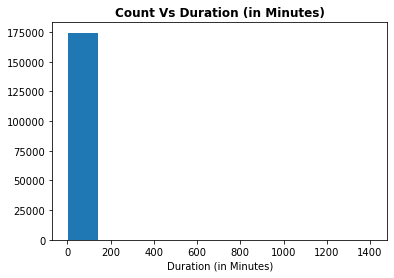

In [84]:
plt.hist(data=df_clean, x='duration_min');
plt.xlabel('Duration (in Minutes)');
plt.title('Count Vs Duration (in Minutes)', fontweight='bold');

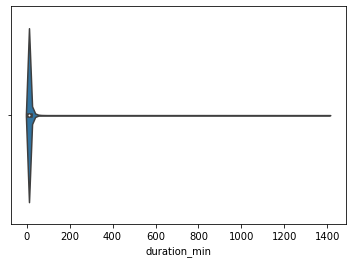

In [85]:
sb.violinplot(data = df_clean, x = 'duration_min');

The plots indicate that there might be outlier(s) in the data.

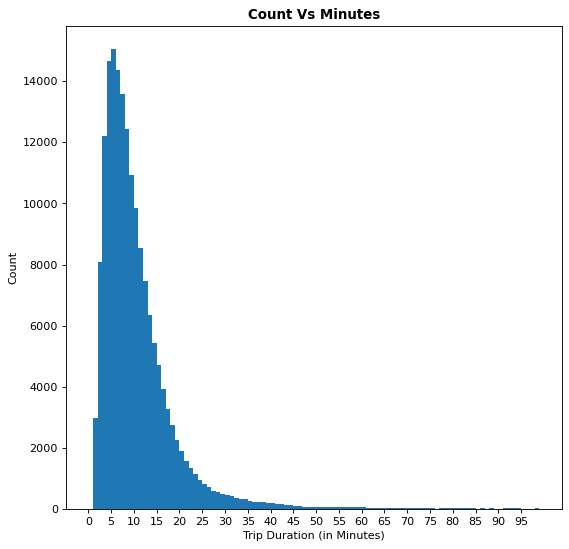

In [86]:
fig=plt.figure(figsize=(8,8), dpi= 80)


bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=df_clean, x='duration_min', bins=bins);
plt.xticks(ticks);
plt.xlabel('Trip Duration (in Minutes)');
plt.ylabel('Count')
plt.title('Count Vs Minutes', fontweight='bold');

The data is stretched out by outliers, most trips are observed to take around 60 minutes at most

In [87]:
df_clean.duration_min.describe(percentiles=[.99])

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
50%           8.500000
99%          52.933333
max        1409.133333
Name: duration_min, dtype: float64

After investigating the duration_min variable, I observed that 99% of trip durations were below 60 minutes.

Therefore, I will explore the distribution to make a decision accordingly. 

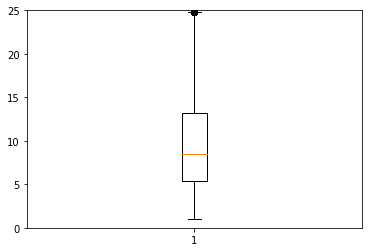

In [88]:
x_min, x_max, y_min, y_max= 0,2,0,25
plt.axis([x_min, x_max, y_min, y_max])

plt.boxplot(df_clean['duration_min']);

In [89]:
df_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [90]:
q1=5.383333
q3=13.150000

In [91]:
iqr = q3-q1
iqr

7.766667

In [92]:
upper_bound = (1.5 * iqr) + q3
upper_bound

24.800000500000003

The distribution is not a normal distribution. However, by converting it to a logarithmic scale we might get closer to a normal distribution

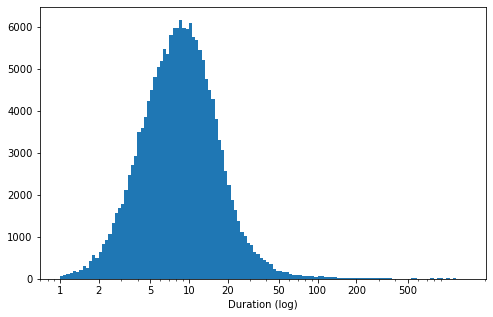

In [93]:
# converting the distribution to a log scale
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlabel('Duration (log)');

After converting the scale to log we got a distribution closer to a normal distribution. However, there still a long tail at the end indicating the influence of the outliers still exists.

In [94]:
# dropping trips taking more than 100 minutes
df_clean = df_clean[df_clean['duration_min'] <= 100]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174249 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174249 non-null  int64         
 1   start_time               174249 non-null  datetime64[ns]
 2   end_time                 174249 non-null  datetime64[ns]
 3   start_station_id         174249 non-null  object        
 4   start_station_name       174249 non-null  object        
 5   start_station_latitude   174249 non-null  float64       
 6   start_station_longitude  174249 non-null  float64       
 7   end_station_id           174249 non-null  object        
 8   end_station_name         174249 non-null  object        
 9   end_station_latitude     174249 non-null  float64       
 10  end_station_longitude    174249 non-null  float64       
 11  bike_id                  174249 non-null  object        
 12  user_type       

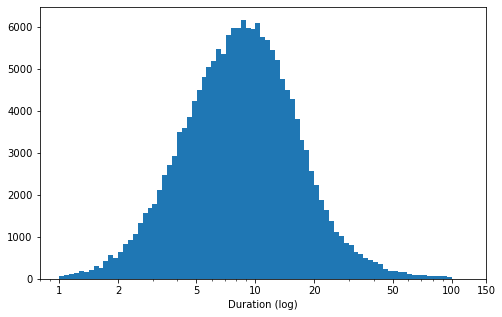

In [95]:
# converting the distribution to a log scale
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 150], [1, 2, 5, 10, 20, 50, 100, 150]);
plt.xlabel('Duration (log)');

After dropping these trips; the duration_min now follows a normal distribution

In [96]:
df_clean.duration_min.describe()

count    174249.000000
mean         10.564178
std           8.462484
min           1.016667
25%           5.366667
50%           8.483333
75%          13.066667
max          99.766667
Name: duration_min, dtype: float64

After cleaning the data and removing outliers, the mean value for trip durations in minutes is about 8.5 minutes.

### Exploring members' age

In [97]:
df_clean['member_age'].describe()

count    174249.000000
mean         34.191972
std          10.117930
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

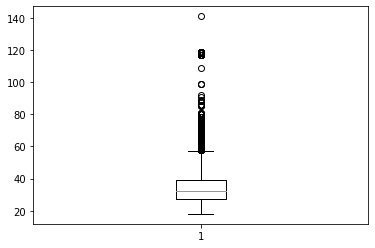

In [98]:
plt.boxplot(df_clean['member_age']);

The data is imbalanced. The maximum age value of 141 years is an abnormal value. 

In [99]:
q1=27.00
q3=39.00

In [100]:
iqr=q3-q1
iqr

12.0

In [101]:
upper_bound = (1.5 * iqr) + q3
upper_bound

57.0

In [102]:
# dropping outliers while keeping age values below 60 years old
df_clean = df_clean[df_clean['member_age'] <= 60]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170732 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170732 non-null  int64         
 1   start_time               170732 non-null  datetime64[ns]
 2   end_time                 170732 non-null  datetime64[ns]
 3   start_station_id         170732 non-null  object        
 4   start_station_name       170732 non-null  object        
 5   start_station_latitude   170732 non-null  float64       
 6   start_station_longitude  170732 non-null  float64       
 7   end_station_id           170732 non-null  object        
 8   end_station_name         170732 non-null  object        
 9   end_station_latitude     170732 non-null  float64       
 10  end_station_longitude    170732 non-null  float64       
 11  bike_id                  170732 non-null  object        
 12  user_type       

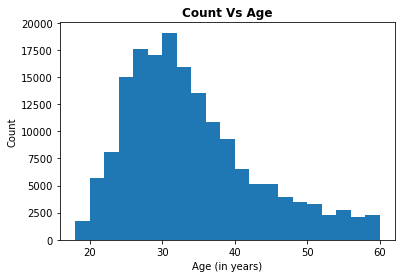

In [103]:
binsize = 2
bins = np.arange(18, df_clean['member_age'].max()+binsize, binsize)
plt.hist(data = df_clean, x = 'member_age', bins = bins);
plt.xlabel('Age (in years)');
plt.ylabel('Count');
plt.title('Count Vs Age', fontweight='bold');

After removing unusual entries, the data looks cleaner.

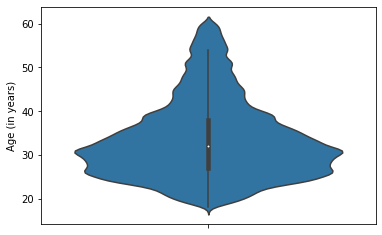

In [104]:
sb.violinplot(data = df_clean, y = 'member_age');
plt.ylabel('Age (in years)');

However, the distribution is observed to be right skewed. This makes sence as most bikers are of young age around 30 years old, while fewer bikers are above 40 years old

## Variation of Users by days and hours

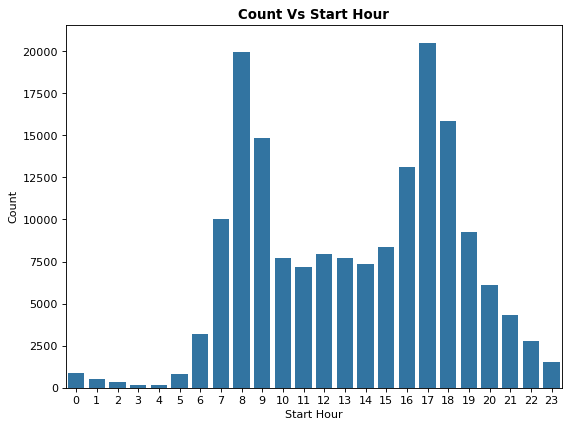

In [105]:
fig=plt.figure(figsize=(8, 6), dpi= 80)

sb.countplot(data = df_clean, x = 'start_time_hour', color = default_color);
plt.xlabel('Start Hour');
plt.ylabel('Count');
plt.title('Count Vs Start Hour', fontweight='bold');

Peak biking hours are around 08:00 and 17:00 which is the rush hour. Moreover, most bikers cycle in the time range between 07:00 till around 19:00

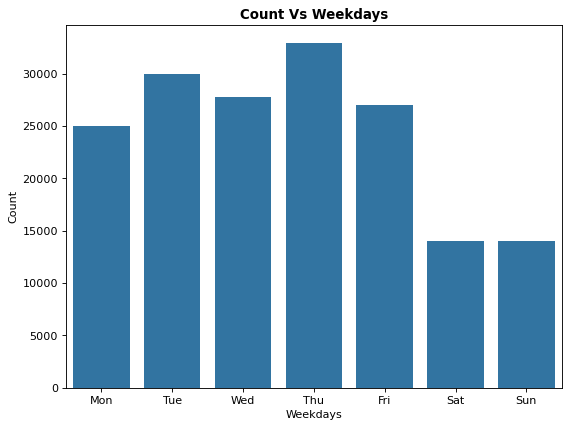

In [106]:
fig=plt.figure(figsize=(8, 6), dpi= 80)

sb.countplot(data = df_clean, x = 'start_time_day', color = default_color);
plt.xlabel('Weekdays');
plt.ylabel('Count');
plt.title('Count Vs Weekdays', fontweight='bold');

Most bikes are rented on Thursdays.

Renting on weekdays is observed to be higher than on weekends.

## Visualizing genders

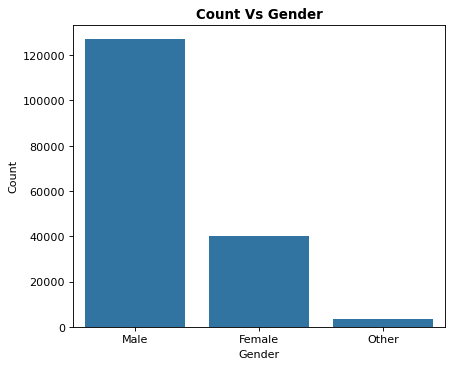

In [107]:
fig=plt.figure(figsize=(6, 5), dpi= 80)

sb.countplot(data = df_clean, x = 'member_gender', color = default_color);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Count Vs Gender', fontweight='bold');

Male bikers are more than threefolds female bikers.

## Visualizing User types

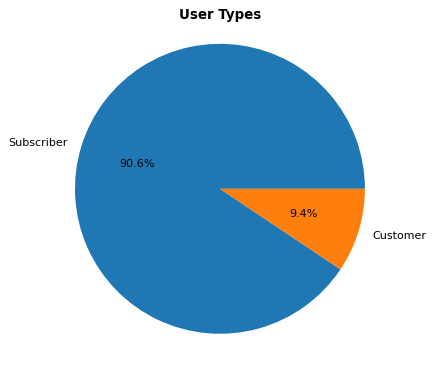

In [108]:
fig=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.pie(df_clean['user_type'].value_counts(),labels=df_clean['user_type'].value_counts().index,autopct= '%1.1f%%')
plt.title('User Types', y=.95, fontweight='bold', color = 'black');

About 90.6% of all bikers that use Ford GoBike are subscibers

In [109]:
# Exporting the cleaned dataset
df_clean.to_csv('clean_dataset.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

As mentioned above the distribution of the variables explored were not evenly distributed. I had to convert the duration_sec to minutes for easier exploration as well as transform the newely converted variable to a log scale in order to get a normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The duration variable had a long tail that was fixed by dropping values above 100 minutes. Furthermore, I dropped unrealistic data entries from the age variable since some bikers were recorded older than 100 years and a maximum of 141 years old bikers were also present in the data which resulted in a cleaner form of the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Investigating trip duration per day

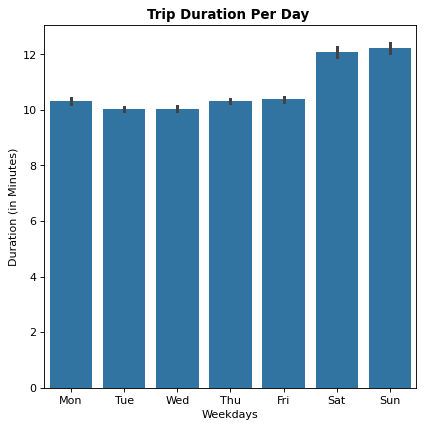

In [110]:
fig=plt.figure(figsize=(6,6), dpi= 80)

sb.barplot(data=df_clean, x='start_time_day', y='duration_min', color=default_color,order=weekdays);
plt.xlabel('Weekdays');
plt.ylabel('Duration (in Minutes)');
plt.title('Trip Duration Per Day ',fontweight='bold');

Ironically, during weekends the average minutes is higher than weekdays even though we already concluded that there are fewer bikers on weekends.

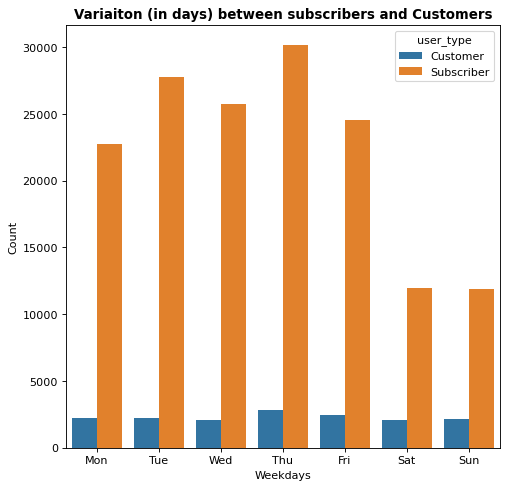

In [111]:
fig=plt.figure(figsize=(7,7), dpi= 80)

sb.countplot(data=df_clean, x='start_time_day', hue='user_type',order=weekdays);
plt.xlabel('Weekdays');
plt.ylabel('Count');
plt.title('Variaiton (in days) between subscribers and Customers', fontweight='bold');

We can conclude that most subscribers cycle on weekdays to work which is suggested by the drop in the count on weekends. 

While on the other hand, customers' count is consistent through out the week, which indicate that they cycle as a habit or for fun on their free time.

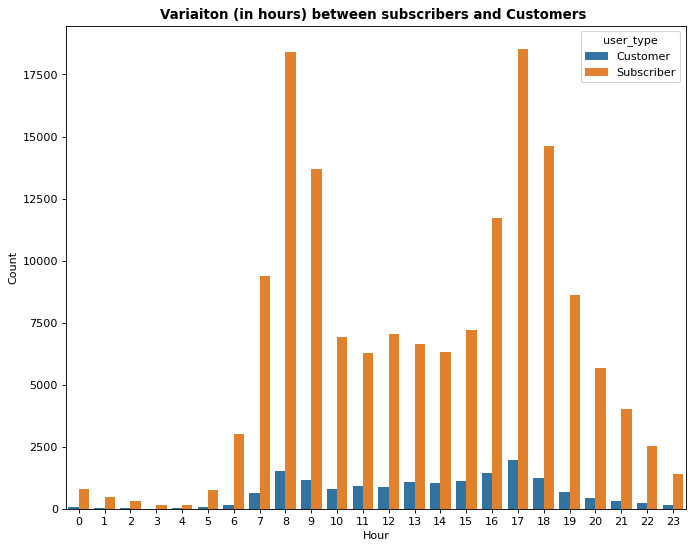

In [112]:
fig=plt.figure(figsize=(10,8), dpi= 80)

sb.countplot(data=df_clean, x='start_time_hour', hue='user_type');
plt.xlabel('Hour');
plt.ylabel('Count');
plt.title('Variaiton (in hours) between subscribers and Customers ', fontweight='bold');

Both subscribers and customers maintain a similar pattern where the peak time is usually between 07:00 and 19:00 with respect to their ratio which supports our first conclusion.

#### Investigating their distributions

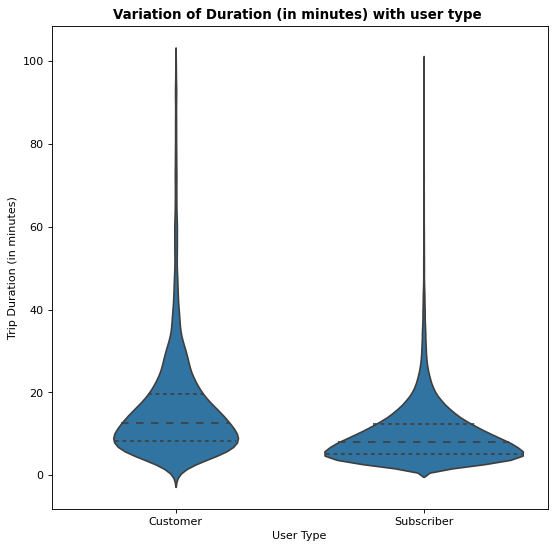

In [113]:
fig=plt.figure(figsize=(8,8), dpi= 80)

sb.violinplot(data=df_clean, x='user_type', y='duration_min', color=default_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration (in minutes)');
plt.title('Variation of Duration (in minutes) with user type ',fontweight='bold');

Customer's distribution indicate their randomness since they are more spread out. while subscribers are more concentrated which indicate their pattern in cycling (for instance, they cycle to and from work for a set duration every weekday).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Summarizing my obesrvations so far, the fact that during weekends the average trip duration in minutes is higher than weekdays even though there are fewer bikers on weekends is interesting. Moreover, what also caught my eye was the huge gap between the number of subscribers and the number of customers which indicated that subscribers cycle more often than customers on weekdays specifically.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, after concluding that subscribers actually do have a fixed pattern on weekdays, this conclusion indicated that they cycle to and from work for a fixed duration, unlike customers who cycle for random durations.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

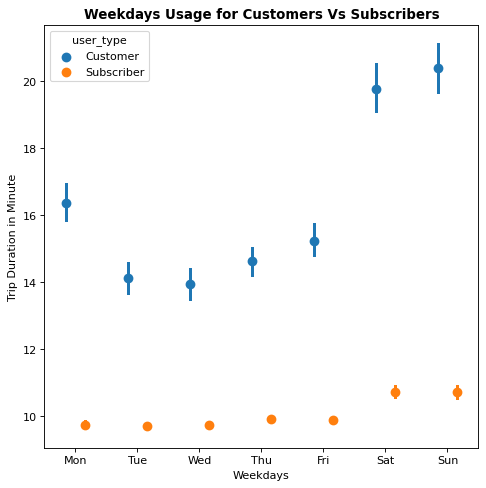

In [114]:
fig=plt.figure(figsize=(7,7), dpi= 80)

plt.title("Weekdays Usage for Customers Vs Subscribers", fontweight='bold')




sb.pointplot(data=df_clean, x='start_time_day', y='duration_min', hue='user_type', dodge=0.3, linestyles="",order=weekdays);
plt.xlabel('Weekdays');
plt.ylabel('Trip Duration in Minute');

The plot indicates that customers ride for longer durations than subscribers throughout the whole week. However, customers are inconsistent with their pattern as observed before, unlike subscribers who cycle regularly to commute to work on weekdays.

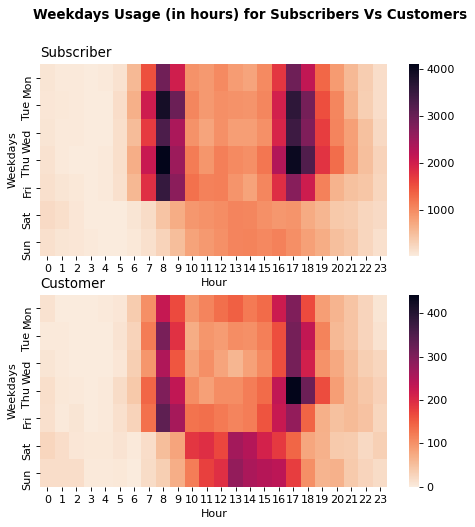

In [115]:
fig=plt.figure(figsize=(7,7), dpi= 80)

plt.suptitle("Weekdays Usage (in hours) for Subscribers Vs Customers",fontweight='bold')

plt.subplot(2, 1, 1)
subscribers = df_clean[df_clean['user_type']=='Subscriber']
subscriber_counts = subscribers.groupby(['start_time_day', 'start_time_hour']).size()
subscriber_counts = subscriber_counts.reset_index(name='count')
subscriber_counts = subscriber_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(subscriber_counts, cmap='rocket_r');
plt.title('Subscriber', loc='left');
plt.xlabel('Hour');
plt.ylabel('Weekdays');


plt.subplot(2, 1, 2)
customers = df_clean[df_clean['user_type']=='Customer']
customer_counts = customers.groupby(['start_time_day', 'start_time_hour']).size()
customer_counts = customer_counts.reset_index(name='count')
customer_counts = customer_counts.pivot(index='start_time_day', columns='start_time_hour', values='count')
sb.heatmap(customer_counts, cmap='rocket_r');
plt.title('Customer', loc='left');
plt.xlabel('Hour');
plt.ylabel('Weekdays');

As concluded above, subscribers cycle usually between 07:00 and 19:00 which are regular working hours on weekdays. While on the other hands most customers have a similar but more random pattern. However, the plot indicates an interesting insight that some customers might also be using Ford goBikes to cycle to their work.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The conclusion from this part of the investigation did support and strengthen the insight we deducted from our analysis so far. The relationship between subscribers and customers vary by many factors. As described above, subscribers are used to a cycling pattern unlike customers. However, they do cycle for shorter fixed durations. Customers on the other hand do not have a fixed pattern since the majority of them most probably just cycle for fun. Additionally, Some customers might also use Ford goBikes to cycle to work since there is a sudden increase in their cycling habit around the rush hour. 

### Were there any interesting or surprising interactions between features?

After thoroughly investigating the variables we were interested in and analyzing them I found that most of the insights are not that surprising. Most of these insights are interesting though specially finding out that the average minutes on weekends are higher than weekdays even though there are fewer bikers on weekends.